# Fitting model
This notebook contains necessary codes for fitting the models. Here we will use cleaned dataset from previous session.

## 1. Import packages

In [3]:
# !pip install brewer2mpl
# import necessary package

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='ignore')
from time import time


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}


plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.0.2
0.9.0


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

!pip install --upgrade vecstack
from vecstack import stacking

## 2. Import dataset

In [5]:
data = pd.read_csv('data/data_6037.csv')

In [6]:
data.head()

,Unnamed: 0,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,0,17054981,nan,nan,nan,5.00000,4.00000,nan,nan,5.00000,nan,1968.00000,3760.00000,3760.00000,nan,nan,1968.00000,nan,6111.00000,4.00000,5.00000,3.00000,784.00000,NaN,nan,34449407.00000,-119254052.00000,42688.00000,1.00000,735.00000,nan,nan,1.00000,1110,261.00000,NaN,61110009.01103,13091.00000,2061.00000,nan,97099.00000,11.00000,nan,nan,nan,nan,nan,nan,1982.00000,2.00000,NaN,494390.00000,859741.00000,2015.00000,365351.00000,9608.74000,NaN,nan,61110009011034.00000,-0.01310,2017-06-15
1,1,17054981,nan,nan,nan,5.00000,4.00000,nan,nan,5.00000,nan,1968.00000,3760.00000,3760.00000,nan,nan,1968.00000,nan,6111.00000,4.00000,5.00000,3.00000,784.00000,NaN,nan,34449407.00000,-119254052.00000,42688.00000,1.00000,735.00000,nan,nan,1.00000,1110,261.00000,NaN,61110009.01103,13091.00000,2061.00000,nan,97099.00000,11.00000,nan,nan,nan,nan,nan,nan,1982.00000,2.00000,NaN,501928.00000,872850.00000,2016.00000,370922.00000,9673.46000,NaN,nan,61110009011034.00000,-0.01310,2017-06-15
2,2,17055743,nan,nan,nan,2.00000,3.00000,nan,nan,2.00000,66.00000,1444.00000,1444.00000,1444.00000,nan,nan,1444.00000,nan,6111.00000,nan,2.00000,1.00000,0.00000,NaN,nan,34454169.00000,-119237898.00000,7108.00000,nan,nan,nan,nan,nan,1110,261.00000,NaN,61110009.03401,13091.00000,2061.00000,nan,97099.00000,6.00000,nan,nan,nan,nan,nan,nan,1951.00000,1.00000,NaN,128881.00000,429608.00000,2015.00000,300727.00000,5494.04000,NaN,nan,61110009034011.00000,0.07399,2017-07-26
3,3,17055743,nan,nan,nan,2.00000,3.00000,nan,nan,2.00000,66.00000,1444.00000,1444.00000,1444.00000,nan,nan,1444.00000,nan,6111.00000,nan,2.00000,1.00000,0.00000,NaN,nan,34454169.00000,-119237898.00000,7108.00000,nan,nan,nan,nan,nan,1110,261.00000,NaN,61110009.03401,13091.00000,2061.00000,nan,97099.00000,6.00000,nan,nan,nan,nan,nan,nan,1951.00000,1.00000,NaN,130845.00000,436157.00000,2016.00000,305312.00000,5538.80000,NaN,nan,61110009034011.00000,0.07399,2017-07-26
4,4,17068109,nan,nan,nan,1.50000,3.00000,nan,nan,1.50000,66.00000,1698.00000,1698.00000,1698.00000,nan,nan,1698.00000,nan,6111.00000,1.00000,1.00000,0.00000,0.00000,NaN,nan,34365693.00000,-119448392.00000,2588.00000,nan,nan,nan,nan,nan,1110,261.00000,NaN,61110012.06109,34543.00000,2061.00000,nan,97081.00000,6.00000,nan,1.00000,nan,nan,nan,nan,1979.00000,1.00000,NaN,190508.00000,282303.00000,2015.00000,91795.00000,2954.74000,NaN,nan,61110012061086.00000,0.07189,2017-07-28


In [7]:
# data1 contains all the columns
data1 = data.iloc[:,1:]

In [9]:
X_1 = data1.iloc[:,:-1]
y_1 = data1.iloc[:,-1]

In [10]:
y_1.shape

(329058,)

In [11]:
X_1.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror
0,17054981,nan,nan,nan,5.00000,4.00000,nan,nan,5.00000,nan,1968.00000,3760.00000,3760.00000,nan,nan,1968.00000,nan,6111.00000,4.00000,5.00000,3.00000,784.00000,NaN,nan,34449407.00000,-119254052.00000,42688.00000,1.00000,735.00000,nan,nan,1.00000,1110,261.00000,NaN,61110009.01103,13091.00000,2061.00000,nan,97099.00000,11.00000,nan,nan,nan,nan,nan,nan,1982.00000,2.00000,NaN,494390.00000,859741.00000,2015.00000,365351.00000,9608.74000,NaN,nan,61110009011034.00000,-0.01310
1,17054981,nan,nan,nan,5.00000,4.00000,nan,nan,5.00000,nan,1968.00000,3760.00000,3760.00000,nan,nan,1968.00000,nan,6111.00000,4.00000,5.00000,3.00000,784.00000,NaN,nan,34449407.00000,-119254052.00000,42688.00000,1.00000,735.00000,nan,nan,1.00000,1110,261.00000,NaN,61110009.01103,13091.00000,2061.00000,nan,97099.00000,11.00000,nan,nan,nan,nan,nan,nan,1982.00000,2.00000,NaN,501928.00000,872850.00000,2016.00000,370922.00000,9673.46000,NaN,nan,61110009011034.00000,-0.01310
2,17055743,nan,nan,nan,2.00000,3.00000,nan,nan,2.00000,66.00000,1444.00000,1444.00000,1444.00000,nan,nan,1444.00000,nan,6111.00000,nan,2.00000,1.00000,0.00000,NaN,nan,34454169.00000,-119237898.00000,7108.00000,nan,nan,nan,nan,nan,1110,261.00000,NaN,61110009.03401,13091.00000,2061.00000,nan,97099.00000,6.00000,nan,nan,nan,nan,nan,nan,1951.00000,1.00000,NaN,128881.00000,429608.00000,2015.00000,300727.00000,5494.04000,NaN,nan,61110009034011.00000,0.07399
3,17055743,nan,nan,nan,2.00000,3.00000,nan,nan,2.00000,66.00000,1444.00000,1444.00000,1444.00000,nan,nan,1444.00000,nan,6111.00000,nan,2.00000,1.00000,0.00000,NaN,nan,34454169.00000,-119237898.00000,7108.00000,nan,nan,nan,nan,nan,1110,261.00000,NaN,61110009.03401,13091.00000,2061.00000,nan,97099.00000,6.00000,nan,nan,nan,nan,nan,nan,1951.00000,1.00000,NaN,130845.00000,436157.00000,2016.00000,305312.00000,5538.80000,NaN,nan,61110009034011.00000,0.07399
4,17068109,nan,nan,nan,1.50000,3.00000,nan,nan,1.50000,66.00000,1698.00000,1698.00000,1698.00000,nan,nan,1698.00000,nan,6111.00000,1.00000,1.00000,0.00000,0.00000,NaN,nan,34365693.00000,-119448392.00000,2588.00000,nan,nan,nan,nan,nan,1110,261.00000,NaN,61110012.06109,34543.00000,2061.00000,nan,97081.00000,6.00000,nan,1.00000,nan,nan,nan,nan,1979.00000,1.00000,NaN,190508.00000,282303.00000,2015.00000,91795.00000,2954.74000,NaN,nan,61110012061086.00000,0.07189


In [12]:
X_1.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,329058.00000,106177.00000,930.00000,176.00000,328905.00000,328905.00000,47.00000,209705.00000,325831.00000,2515.00000,25539.00000,327533.00000,313534.00000,140.00000,12395.00000,25539.00000,1464.00000,328905.00000,35364.00000,325831.00000,109543.00000,109543.00000,207373.00000,328905.00000,328905.00000,292667.00000,66992.00000,3646.00000,3184.00000,4453.00000,62495.00000,328905.00000,328905.00000,322475.00000,328905.00000,130840.00000,328774.00000,328905.00000,176.00000,43743.00000,1038.00000,213210.00000,9953.00000,320.00000,327197.00000,75169.00000,328129.00000,328902.00000,328905.00000,328902.00000,328882.00000,8966.00000,327348.00000,329058.00000
mean,13000525.29329,1.81950,7.29892,692.22727,2.29178,3.04485,4.00000,6.04858,2.31298,66.00000,1354.02690,1775.37181,1750.70047,1393.91429,2350.71416,1365.58604,2224.37295,6048.91169,1.18861,2.24526,1.81320,347.03652,3.91104,34006666.47624,-118200484.56220,29448.81838,1.00000,517.99561,1.00000,1.00000,1.00000,261.87343,60492209.32255,33768.21766,2526.63593,189256.21652,96585.59071,1.48747,7.00000,1.00885,6.02312,1.10629,306.61228,269.11250,1968.85467,1.43965,184331.45456,471908.13930,2015.50010,288009.90866,5943.24372,13.85657,60494600969537.20312,0.01082
std,2985271.42492,2.97766,2.72668,589.90025,0.98980,1.13678,0.00000,1.87635,0.96936,0.00000,651.55871,924.80989,911.00176,118.49436,1017.82760,692.82163,1299.25115,20.74618,0.48534,0.95636,0.58718,262.20018,3.63738,265320.79699,360755.03599,121100.11623,0.00000,155.25163,0.00000,0.00000,0.00000,4.89759,205879.61495,46929.80257,804.73430,166005.53423,3608.88573,2.82954,0.00000,0.10836,0.49242,0.99293,224.52993,295.02765,23.66545,0.54448,213818.94773,577997.51823,0.50000,426335.59624,6920.99496,2.43129,1064475124550.40820,0.08450
min,10711738.00000,1.00000,2.00000,38.00000,0.00000,0.00000,4.00000,1.00000,1.00000,66.00000,44.00000,2.00000,2.00000,1056.00000,526.00000,44.00000,257.00000,6037.00000,1.00000,1.00000,0.00000,0.00000,1.00000,33339295.00000,-119475416.00000,167.00000,1.00000,24.00000,1.00000,1.00000,1.00000,31.00000,60371011.10100,3491.00000,1286.00000,6952.00000,95982.00000,0.00000,7.00000,1.00000,4.00000,1.00000,11.00000,12.00000,1824.00000,1.00000,44.00000,22.00000,2015.00000,22.00000,27.70000,3.00000,60371011101000.00000,-0.33112
25%,11547486.00000,1.00000,7.00000,278.25000,2.00000,2.00000,4.00000,4.00000,2.00000,66.00000,945.00000,1185.00000,1174.00000,1344.00000,1633.00000,945.00000,1097.25000,6037.00000,1.00000,2.00000,2.00000,0.00000,2.00000,33812400.00000,-118414000.00000,5704.00000,1.00000,420.00000,1.00000,1.00000,1.00000,261.00000,60373203.00401,12447.00000,1286.00000,46736.00000,96197.00000,0.00000,7.00000,1.00000,6.00000,1.00000,175.00000,85.50000,1953.00000,1.00000,83727.00000,207105.00000,2015.00000,86471.00000,2814.07250,14.00000,60373203001025.00000,-0.02430
50%,12547135.00000,1.00000,7.00000,582.00000,2.00000,3.00000,4.00000,7.00000,2.00000,66.00000,1251.00000,1541.00000,1521.00000,1440.00000,2088.00000,1252.00000,1923.50000,6037.00000,1.00000,2.00000,2.00000,434.00000,2.00000,34021346.00000,-118175074.00000,7200.00000,1.00000,500.00000,

In [14]:
def rolling_strategy(model, data):
    result = list(np.array(data2.Stkcd)[:50000])
    iteration = int((data.shape[0] - 50000)/10000)
    for i in range(iteration):
        if i != iteration - 1:
            X_train = data2.iloc[10000 * i:10000 * i + 50000,1:]
            y_train = data2.iloc[10000 * i:10000 * i + 50000,0]
            X_test = data2.iloc[10000 * i + 50000:10000 * i + 60000,1:]
            model.fit(X_train, y_train)
            
            result += list(model.predict(X_test))
            
        if i == iteration - 1:
            X_train = data2.iloc[10000 * i:10000 * i + 50000,1:]
            y_train = data2.iloc[10000 * i:10000 * i + 50000,0]
            X_test = data2.iloc[10000 * i + 50000:,1:]
            model.fit(X_train, y_train)
            result += list(model.predict(X_test))
    return result
            
            
    
    

In [15]:
train_X_1, test_X_1, train_y_1, test_y_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)

In [16]:
train_X_1.shape

(220468, 59)

In [18]:
X_1.shape

(329058, 13)

In [19]:
np.array(train_y_1).shape

(220468,)

## 3. Baseline Models

In [20]:
lr = LinearRegression()
lr.fit(train_X_1, train_y_1[:,np.newaxis])
lr.score(test_X_1, test_y_1)

0.005175216566091323

In [22]:
lasso = Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

dt = DecisionTreeRegressor(max_depth = 50,
                          min_samples_split = 20,
                          min_samples_leaf = 4,
                          max_features = 'sqrt')

rf = RandomForestRegressor(n_estimators = 200,
                           max_depth = 50,
                          min_samples_split = 20,
                          min_samples_leaf = 4,
                          max_features = 'sqrt')

mlp = MLPRegressor(activation = 'logistic',
                    solver = 'adam',
                    learning_rate = 'adaptive')
    
    
xgb_reg = xgb.XGBRegressor(objective = 'reg:linear', # linear regression
                                eval_metric = 'rmse', # 评估参数 logloss也可以
                                nthread = -1, # 多线程
                                silent = 1, # 打印每次iteration结果，1不打印


                                min_child_weight = 10, # 孩子节点中最小的样本权重和。该成熟越大算法越conservative。default 1
                                max_depth = 7,
                                max_delta_step = 1.8, # 1-10，树内迭代速率，越大越快（拟合速度越快）。

                                colsample_bytree = 0.4, # 在建立树时对特征采样的比例。
                                subsample = 0.8, # 用于训练模型的子样本占整个样本集合的比例。防止过拟合

                                # 'alpha': 10 # 学习速率
                                eta = 0.025, # 学习速率收缩系数，越大越保守
                                gamma = 0.65, # 保守程度，0-1
                                num_boost_round = 700, # 迭代数量

                                seed = 12333 # 随即下降的初始状态
                          )

KNN = KNeighborsRegressor(n_neighbors=5)

In [23]:
models = [lr, lasso, dt, rf, mlp, xgb_reg, KNN]

from sklearn.metrics import mean_squared_error
def fitting_process(model):
    model.fit(train_X_1, train_y_1[:,np.newaxis])
    pred_y = model.predict(test_X_1)
    
    return mean_squared_error(pred_y, test_y_1)

In [24]:
result = []
for model in models:
    result.append(abs(fitting_process(model)))

/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/kevin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:202: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:209: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', De

In [25]:
result

[0.26170426029301574,
 0.2630716589718462,
 0.26938475557988484,
 0.21973342901113624,
 0.26161050457311946,
 0.2523094457177659,
 0.3039298292227583]

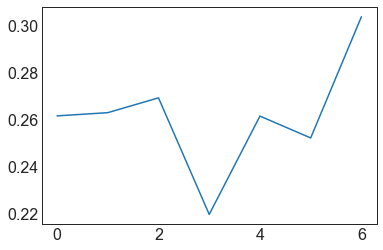

In [26]:
plt.plot(result)

## 4. Fit the stacking model

In [28]:

S_train, S_test = stacking(models,                   
                           train_X_1, train_y_1, test_X_1,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=mean_squared_error, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [7]

model  0:     [LinearRegression]


/Users/kevin/anaconda3/lib/python3.6/site-packages/vecstack/core.py:459: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


    fold  0:  [0.25473032]
    fold  1:  [0.25752539]
    fold  2:  [0.25871225]
    fold  3:  [0.25847319]
    fold  4:  [0.25812120]
    ----
    MEAN:     [0.25751247] + [0.00144731]
    FULL:     [0.25751246]

model  1:     [Lasso]
    fold  0:  [0.25578950]
    fold  1:  [0.25907781]
    fold  2:  [0.25933188]
    fold  3:  [0.25940196]
    fold  4:  [0.25935252]
    ----
    MEAN:     [0.25859073] + [0.00140512]
    FULL:     [0.25859072]

model  2:     [DecisionTreeRegressor]
    fold  0:  [0.27476107]
    fold  1:  [0.27783283]
    fold  2:  [0.27854299]
    fold  3:  [0.27294078]
    fold  4:  [0.27714030]
    ----
    MEAN:     [0.27624359] + [0.00208439]
    FULL:     [0.27624361]

model  3:     [RandomForestRegressor]
    fold  0:  [0.22022663]
    fold  1:  [0.22467417]
    fold  2:  [0.22525492]
    fold  3:  [0.22413209]
    fold  4:  [0.22368890]
    ----
    MEAN:     [0.22359534] + [0.00176426]
    FULL:     [0.22359534]

model  4:     [MLPRegressor]
    fold  0:  [0.

/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:202: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:209: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


    fold  0:  [0.24629551]


/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:202: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:209: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


    fold  1:  [0.25043249]


/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:202: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:209: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


    fold  2:  [0.25030700]


/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:202: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:209: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


    fold  3:  [0.24976358]


/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:202: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:209: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


    fold  4:  [0.24971336]
    ----
    MEAN:     [0.24930239] + [0.00153031]
    FULL:     [0.24930238]

model  6:     [KNeighborsRegressor]
    fold  0:  [0.29790277]
    fold  1:  [0.30239481]
    fold  2:  [0.30412658]
    fold  3:  [0.29959296]
    fold  4:  [0.30133919]
    ----
    MEAN:     [0.30107126] + [0.00216256]
    FULL:     [0.30107127]



In [29]:
model = xgb.XGBRegressor(objective = 'reg:linear', # linear regression
                                eval_metric = 'rmse', # 评估参数 logloss也可以
                                nthread = -1, # 多线程
                                silent = 1, # 打印每次iteration结果，1不打印


                                min_child_weight = 10, # 孩子节点中最小的样本权重和。该成熟越大算法越conservative。default 1
                                max_depth = 7,
                                max_delta_step = 1.8, # 1-10，树内迭代速率，越大越快（拟合速度越快）。

                                colsample_bytree = 0.4, # 在建立树时对特征采样的比例。
                                subsample = 0.8, # 用于训练模型的子样本占整个样本集合的比例。防止过拟合

                                # 'alpha': 10 # 学习速率
                                eta = 0.025, # 学习速率收缩系数，越大越保守
                                gamma = 0.65, # 保守程度，0-1
                                num_boost_round = 700, # 迭代数量

                                seed = 12333 # 随即下降的初始状态
                          )
    
model = model.fit(S_train, train_y_1)

y_pred = model.predict(S_test)


/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:202: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Users/kevin/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:209: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


In [30]:
result.append(mean_squared_error(y_pred, test_y_1))